## Code that analyzes the adsorption results (Raw data from "MOI_Adsorption.xlsx" in Github Folder "Experimental Data")

In [24]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import figure
import pandas as pd
from scipy import integrate
import numpy.matlib
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics
  
from operator import add
plt.style.use("seaborn-v0_8-white")
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.minor.size'] = 5
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 5


In [25]:
def Model_superinfvsres(y,t,pars):
    #pars['res'] == 1 : host resistant to superinfection , pars['res'] == 0 : host can adsorb limitless viruses 
    if pars['res'] == 1: 
        dy= np.zeros(3)
        S = y[0]
        I = y[1]
        V = y[2]

        dy[0] = -pars['phi'] * S * V
        dy[1] = pars['phi'] * S * V 
        dy[2] = - pars['phi'] * S * V 
        return dy  
    else:
        dy= np.zeros(3)
        S = y[0]
        I = y[1]
        V = y[2]

        dy[0] = -pars['phi'] * S * V
        dy[1] = pars['phi'] * S * V 
        dy[2] = -pars['phi'] * S * V -pars['phi'] * I * V
        return dy 

## Result if there was no immediate resistance and there was limitless superinfection

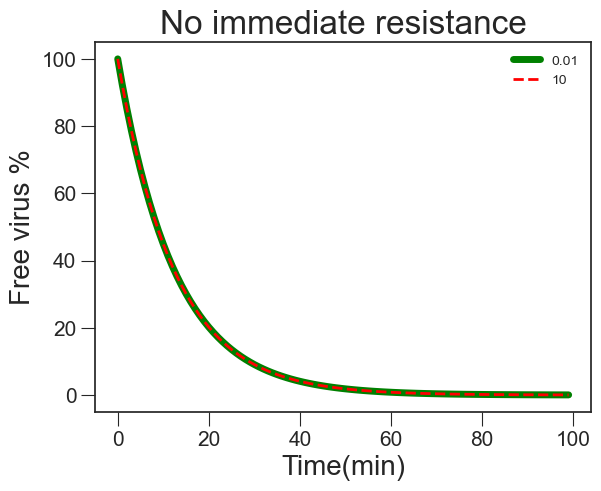

In [27]:
pars={}
t=np.arange(0,100)
MOI = 0.01
pars['res'] = 0
pars['phi'] = 4*10**-10
y0 = np.zeros(3)
y0[0] = 2*10**8
y0[-1] = MOI * y0[0]
result = integrate.odeint(Model_superinfvsres,y0,t,atol = 10**-8,args=(pars,))
plt.plot(t,result[:,-1]/result[:,-1][0]*100, label = str(MOI),linewidth = 5, color = 'green')
MOI = 10
pars['res'] = 0
y0 = np.zeros(3)
y0[0] = 2*10**8
y0[-1] = MOI * y0[0]
result = integrate.odeint(Model_superinfvsres,y0,t,atol = 10**-8,args=(pars,))
plt.plot(t,result[:,-1]/result[:,-1][0]*100,label = str(MOI),linewidth = 2, linestyle = '--', color = 'red')
plt.ylabel('Free virus %')
plt.xlabel('Time(min)')
plt.title('No immediate resistance')
plt.legend()

## Result if there is immediate resistance to secondary infection

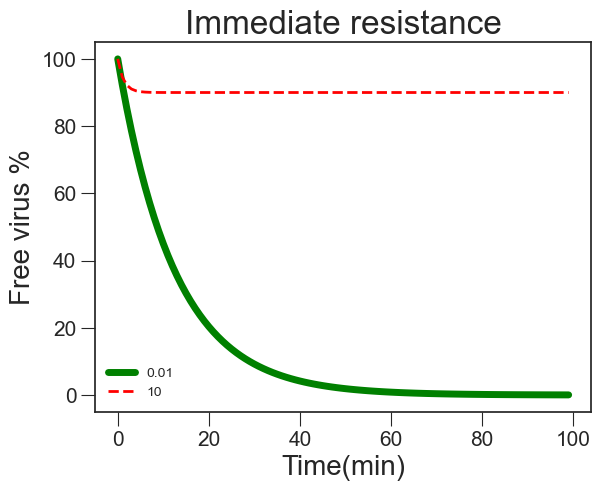

In [29]:
pars={}
t=np.arange(0,100)
MOI = 0.01
pars['res'] = 1
pars['phi'] = 4*10**-10
y0 = np.zeros(3)
y0[0] = 2*10**8
y0[-1] = MOI * y0[0]
S0 =y0[0]
V0= y0[-1]
result = integrate.odeint(Model_superinfvsres,y0,t,atol = 10**-8,args=(pars,))
plt.plot(t,result[:,-1]/result[:,-1][0]*100, label = str(MOI),linewidth = 5, color = 'green')
#plt.plot(t,np.exp(-pars['phi']*S0*t), color = 'black', linestyle = '--')
MOI =10
y0 = np.zeros(3)
y0[0] = 2*10**8
y0[-1] = MOI * y0[0]
S0 =y0[0]
V0= y0[-1]
result = integrate.odeint(Model_superinfvsres,y0,t,atol = 10**-8,args=(pars,))
plt.plot(t,result[:,-1]/result[:,-1][0]*100,label = str(MOI), linewidth = 2, linestyle = '--', color = 'red')
#plt.plot(t,1-(1/MOI)+(1/MOI)*np.exp(-pars['phi']*V0*t), color = 'red', linestyle = '--')
plt.legend()
plt.ylabel('Free virus %')
plt.xlabel('Time(min)')
plt.title('Immediate resistance')
plt.legend()

In [30]:
def Model_limited_superinf(y,t,pars):
    if pars['res'] == 1:
        dy= np.zeros(3)
        S = y[0]
        I = y[1]
        V = y[2]

        dy[0] = -pars['phi'] * S * V
        dy[1] = pars['phi'] * S * V 
        dy[2] = - pars['phi'] * S * V 
        return dy  
    else:
        dy= np.zeros(k+2)
        S = y[0]
        I1 = y[1]
        Imid = y[2:k]
        Ik = y[k]
        V = y[k+1]
        
        Iprev = np.concatenate((I1 ,  Imid[0:-1]), axis = None)
        Itotal = np.concatenate((I1 ,  Imid, Ik), axis = None)
        Iads = np.concatenate((I1 ,  Imid), axis = None)

        dy[0] = -pars['phi'] * S * V
        dy[1] = pars['phi'] * S * V - pars['phi'] * I1 * V 
        dy[2:k] = pars['phi'] * Iprev * V - pars['phi'] * Imid * V 
        dy[k] = pars['phi'] * Imid[-1] * V 
        dy[k+1] = -pars['phi'] * S * V - pars['phi'] * np.sum(Iads) * V
        return dy 

In [31]:
data = [100,26.00,16.00,13.00,15.50,15.00,15.50,25.50]

time = [0,5,15,30,45,60,90,120]

err = [0,11.03592618,3.397302852,1.594260539,1.670828138,8.359126749,10.93351118,3.61132478]

## Result comparing experimental adsorption data at bulk MOI 10 to different models (Extended Data Fig. 3)

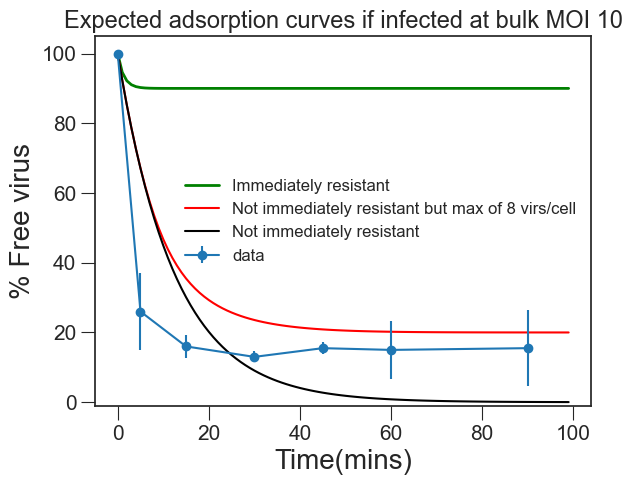

In [33]:
pars={}
t=np.arange(0,100)
MOI = 10
k= 8
pars['res'] = 1
pars['phi'] = 4*10**-10
y0 = np.zeros(3)
y0[0] = 2*10**8
y0[-1] = MOI * y0[0]
S0 =y0[0]
V0= y0[-1]
result = integrate.odeint(Model_limited_superinf,y0,t,atol = 10**-8,args=(pars,))
plt.plot(t,result[:,-1]/result[:,-1][0] * 100, label = 'Immediately resistant',linewidth = 2, color = 'green')
#plt.plot(t,np.exp(-pars['phi']*S0*t), color = 'black', linestyle = '--')
MOI =10

pars['res'] = 0
y0 = np.zeros(k+2)
y0[0] = 2*10**8
y0[-1] = MOI * y0[0]
S0 =y0[0]
V0= y0[-1]
result = integrate.odeint(Model_limited_superinf,y0,t,atol = 10**-8,args=(pars,))
plt.plot(t,result[:,-1]/result[:,-1][0] * 100,label = 'Not immediately resistant but max of 8 virs/cell' , color = 'red')
#plt.plot(t,1-(1/MOI)+(1/MOI)*np.exp(-pars['phi']*V0*t), color = 'red', linestyle = '--')

k=20
pars['res'] = 0
y0 = np.zeros(k+2)
y0[0] = 2*10**8
y0[-1] = MOI * y0[0]
S0 =y0[0]
V0= y0[-1]
result = integrate.odeint(Model_limited_superinf,y0,t,atol = 10**-8,args=(pars,))
plt.plot(t,result[:,-1]/result[:,-1][0] * 100,label = 'Not immediately resistant', color = 'black')
#plt.plot(t,1-(1/MOI)+(1/MOI)*np.exp(-pars['phi']*V0*t), color = 'red', linestyle = '--')
plt.errorbar(time[:-1],data[:-1],yerr = err[:-1], marker = 'o', label = 'data')


plt.title('Expected adsorption curves if infected at bulk MOI 10', fontsize = 17)
plt.xlabel('Time(mins)')
plt.ylabel('% Free virus')


plt.ylim(-1,105)
plt.legend(fontsize= 12)
plt.savefig('Exp_Ads.png', bbox_inches = "tight")
